# Install Package

In [ ]:
!pip install mitiq
!pip install qiskit
!pip install pylatexenc

     |████████████████████████████████| 125 kB 4.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
     |████████████████████████████████| 1.8 MB 38.5 MB/s 
     |████████████████████████████████| 15.3 MB 42.4 MB/s 
     |████████████████████████████████| 1.3 MB 62.3 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, whic

     |████████████████████████████████| 6.5 MB 4.1 MB/s 
     |████████████████████████████████| 18.0 MB 98 kB/s 
     |████████████████████████████████| 238 kB 56.4 MB/s 
     |████████████████████████████████| 200 kB 55.4 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 1.6 MB 45.6 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 38.2 MB 1.2 MB/s 
     |████████████████████████████████| 943 kB 65.7 MB/s 
     |████████████████████████████████| 3.6 MB 55.4 MB/s 
     |████████████████████████████████| 113 kB 54.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.2-py3-none-any.whl size=11805 sha256=7a6a085759d0c0a6972a36fa7d297dcc4cf8aa86bd6896874c347178e227c06e
  Stored in directory: /root/.cache/pip/wheels/62/77/65/cda6eedfdd2a525bd3f479a4386930ae3088a1eb01f8c944ed
  Created wheel for python-constraint: filename=python

In [ ]:
from qiskit import *
# Qiskit module
from qiskit import QuantumCircuit
import qiskit.circuit.library as circuit_library
import qiskit.quantum_info as qi
import qiskit.ignis.mitigation as mit

# Qiskit tools for running and monitoring jobs
from qiskit import execute
from qiskit.tools.monitor import job_monitor

from qiskit.tools.visualization import *
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.special import erf
# Other imports
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)
# Qiskit for pulse 
from qiskit import pulse

from qiskit import *
from qiskit.pulse import Play, Schedule, DriveChannel, ControlChannel, Waveform, ShiftPhase
from qiskit.pulse.library import drag, GaussianSquare, Drag
from qiskit.visualization import SchedStyle
from qiskit.providers.aer import AerSimulator

import qiskit.ignis.mitigation as mit

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

from qiskit.circuit.gate import Gate

# Fake backend
#from qiskit.test.mock import FakeAthens

import scipy
from scipy import integrate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  


In [ ]:
from scipy.optimize import curve_fit
#from uncertainties import ufloat

import numpy as np

import qiskit
from qiskit import Aer
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit.providers.aer.noise import NoiseModel
import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error
import pandas as pd
from qiskit.test.mock import *
import matplotlib.pyplot as plt
from qiskit.providers.aer import AerSimulator
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
import itertools
import mitiq
import argparse
# import cma
import os
import sys
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
import atexit
import random

In [ ]:
! pip install uncertainties

     |████████████████████████████████| 98 kB 2.5 MB/s 


In [ ]:
from uncertainties import ufloat

In [ ]:
mitiq.about()


Mitiq: A Python toolkit for implementing error mitigation on quantum computers
Authored by: Mitiq team, 2020 & later (https://github.com/unitaryfund/mitiq)

Mitiq Version:	0.12.0

Core Dependencies
-----------------
Cirq Version:	0.10.0
NumPy Version:	1.21.5
SciPy Version:	1.7.3

Optional Dependencies
---------------------
PyQuil Version:	Not installed
Qiskit Version:	None
Braket Version:	Not installed

Python Version:	3.7.12
Platform Info:	Linux (x86_64)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path='' #path to save the file

In [ ]:
IBMQ.save_account('Your IBM token',overwrite=True )
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

backend_statevector = provider.get_backend('simulator_statevector')

#Your provider
provider = IBMQ.get_provider()

In [ ]:
backend = provider.get_backend('ibmq_casablanca')

properties = backend.properties()

In [ ]:
backend_config = backend.configuration()
ham_params = backend_config.hamiltonian['vars']
dt = backend_config.dt
print(f"Sampling time: {dt*1e9} ns")

Sampling time: 0.2222222222222222 ns


In [ ]:
backend_defaults = backend.defaults()
inst_sched_map = backend_defaults.instruction_schedule_map 
inst_sched_map.instructions

['cx', 'id', 'measure', 'rz', 'sx', 'u1', 'u2', 'u3', 'x']

# Parameter

In [ ]:
L=5

Omega = 2 #0.24 (2 for chaotic regime and 0.24 for Many body scars regime)

V = -1

h = 2*V

T = 4.8 #30 # Total time (4.8 for chaotic regime and 30 for Many body scars regime)

TT=T

n = 30 #20

NN=n

cond='op'

qubits_list=[2,1,3,5,4]

# Expectation Value

In [ ]:
# Reference from the code in IBM open science prize 2020

def stabilizer_coeff_pauli(stabilizer):
    """Return the 1 or -1 coeff and Pauli label."""
    coeff = 1
    pauli = coeff
    if stabilizer[0] == '-':
        coeff = -1
    if stabilizer[0] in ['+', '-']:
        pauli = stabilizer[1:]
    else:
        pauli = stabilizer
    return coeff, pauli

def stabilizer_measure_diagonal(stabilizer):
    """Return the diagonal vector for a stabilizer measurement.
    
    Args:
        stabilizer (str): a stabilizer string
    
    Returns:
        np.ndarray: the diagonal for measurement in the stabilizer basis.
    """
    coeff, pauli = stabilizer_coeff_pauli(stabilizer)
    diag = np.array([1])
    for s in reversed(pauli):
        if s == 'I':
            tmp = np.array([1, 1])
        else:
            tmp = np.array([1, -1])
        diag = np.kron(tmp, diag)
    return coeff * diag

def measure_expval(result_lst, stab, meas_mitigator=None):
    
    result_num = len(result_lst)
    
    #print()
    
    expvals=[]
    
    for i in range(result_num):
    
        expval, stddev = mit.expectation_value(result_lst[i],
                diagonal=stabilizer_measure_diagonal(stab),
                meas_mitigator=meas_mitigator)
        
        expvals.append(expval)
    
    return np.array(expvals)

# Extrapolation

In [ ]:
def mitiq_Extrapolation_PYP_expval_3(job, backend, scale_factors, qubits_list, site_i, even_odd, meas_filter=None, Num=1):

  # linearly extrapolate the expectation value at zero noise 

  N_q = len(qubits_list)

  if type(job) is list:

    Rzz_device_cir_result_counts = []

    for i in job:

      if  backend in provider.backends():


        mit_results = i.result()

      else:

        mit_results = i.result()

      Rzz_device_cir_result_counts += mit_results.get_counts()

  else:

      if  backend in provider.backends():


        mit_results = job.result()

      else:

        mit_results = job.result()

      Rzz_device_cir_result_counts = mit_results.get_counts()

  num_result = len(Rzz_device_cir_result_counts)//Num

  result_list = Rzz_device_cir_result_counts

  Original_num = num_result//len(scale_factors)

  expectation_values=0

  if j=='even':
            
    for k in range(0,L,2):
        
      if k < 2:
          
          left = 0
          
      else:
          
          left = k-1
          
      if k > L-3:
          
          right = 0
          
      else:
          
          right = L-2-k
          
      if k == 0:
          
          stab = ['YI'+'I'*right,'YZ'+'I'*right]
          
      elif k==L-1:
          
          stab = ['I'*left+'IY','I'*left+'ZY']
          
      else:
          
          stab = ['I'*left+'IYI'+'I'*right,'I'*left+'ZYI'+'I'*right,'I'*left+'IYZ'+'I'*right,'I'*left+'ZYZ'+'I'*right]

      expvals=[]

      for stab_str in stab:

          expval1=measure_expval(result_list, stab_str[::-1])

          expvals.append(expval1)

      expectation_values += ((-1)**(site_i+k))*np.sum(expvals[q] for q in range(len(expvals)))/len(expvals)

  if j=='odd':
            
    for k in range(1,L,2):
        
      if k < 2:
          
          left = 0
          
      else:
          
          left = k-1
          
      if k > L-3:
          
          right = 0
          
      else:
          
          right = L-2-k
          
      if k == 0:
          
          stab = ['YI'+'I'*right,'YZ'+'I'*right]
          
      elif k==L-1:
          
          stab = ['I'*left+'IY','I'*left+'ZY']
          
      else:
          
          stab = ['I'*left+'IYI'+'I'*right,'I'*left+'ZYI'+'I'*right,'I'*left+'IYZ'+'I'*right,'I'*left+'ZYZ'+'I'*right]

      expvals=[]

      for stab_str in stab:

          expval1=measure_expval(result_list, stab_str[::-1])

          expvals.append(expval1)

          #print(expval1)

      expectation_values += ((-1)**(site_i+k))*np.sum(expvals[q] for q in range(len(expvals)))/len(expvals)

  y_data={}

  #t=Original_num*len(scale_factors)

  for time_step in range(Original_num):

    data=[]
  
    for scale in range(len(scale_factors)):

      num_scale=len(scale_factors)

      arr = np.array(expectation_values[scale+num_scale*time_step::num_result])

      data.append(arr)

    y_data[time_step]=data

  zne=[]

  zne_std=[]

  X_value = scale_factors

  func = lambda x, a, b: a * x + b

  for time_step in range(Original_num):

    Y_value = y_data[time_step]

    Y_mean = np.array(Y_value).mean(axis = 1)

    Y_std = np.array(Y_value).std(axis = 1)

    best_fit_ab, covar = curve_fit(func, X_value, Y_mean,
                               sigma = Y_std,
                               absolute_sigma = True)
    
    sigma_ab = np.sqrt(np.diagonal(covar))

    bound_upper = func(0, best_fit_ab[0] + sigma_ab[0], best_fit_ab[1] + sigma_ab[1])
    bound_lower = func(0, best_fit_ab[0] - sigma_ab[0], best_fit_ab[1] - sigma_ab[1])

    best_val = func(0, best_fit_ab[0], best_fit_ab[1])

    Std_val = (bound_upper-bound_lower)/2

    zne_std.append(Std_val)

    zne.append(best_val)

  return zne, zne_std

## Error Bar

In [ ]:
import pickle

scale_factors = [1.0,1.5,2.0]

meas_cal_circuits, metadata = mit.expval_meas_mitigator_circuits(5, method='complete')

Tot_r=0

Tot_std_r=0

for i in range(1,L,2):
    
    for j in ['even','odd']:

      path_dir=path+'/mit_job_id_Real'+str(i)+j

      with open(path_dir, 'rb') as handle:

          mit_job_id = pickle.load(handle)

      mit_job = backend.retrieve_job(mit_job_id['MG_Pulse_Plus'+str(i)+j])

      fitter = mit.ExpvalMeasMitigatorFitter(mit_job.result(), metadata).fit()

      path_dir=path+'/MG_Plus_pulse_id'+str(i)+j

      with open(path_dir, 'rb') as handle:
          b = pickle.load(handle)

      job_lst = []

      for job_id in b[(i,j)]:

        job = backend.retrieve_job(job_id)

        job_lst.append(job)

      mitq_zne=mitiq_Extrapolation_PYP_expval_3(job_lst, backend, scale_factors, qubits_list, i, j,meas_filter=fitter,Num=8)

      Tot_r+=np.array(mitq_zne[0])/2

      Tot_std_r+=(np.array(mitq_zne[1])**2)*((np.array(mitq_zne[0])**2)/4)

      mit_job = backend.retrieve_job(mit_job_id['MG_Pulse_minus'+str(i)+j])

      fitter = mit.ExpvalMeasMitigatorFitter(mit_job.result(), metadata).fit()

      path_dir=path+'/MG_minus_pulse_id'+str(i)+j

      with open(path_dir, 'rb') as handle:
          b = pickle.load(handle)

      job_lst = []

      for job_id in b[(i,j)]:

        job = backend.retrieve_job(job_id)

        job_lst.append(job)

      mitq_zne=mitiq_Extrapolation_PYP_expval_3(job_lst, backend, scale_factors, qubits_list, i, j,meas_filter=fitter, Num=8)

      Tot_r-=np.array(mitq_zne[0])/2

      Tot_std_r+=(np.array(mitq_zne[1])**2)*((np.array(mitq_zne[0])**2)/4)

In [ ]:
scale_factors = [1.0,1.5,2.0]

meas_cal_circuits, metadata = mit.expval_meas_mitigator_circuits(5, method='complete')

Tot_i=0

Tot_std_i=0

for i in range(1,L,2):
    
    for j in ['even','odd']:

      path_dir=path+'/mit_job_id_imag'+str(i)+j

      with open(path_dir, 'rb') as handle:

          mit_job_id = pickle.load(handle)

      mit_job = backend.retrieve_job(mit_job_id['G_Pulse_Plus'+str(i)+j])

      fitter = mit.ExpvalMeasMitigatorFitter(mit_job.result(), metadata).fit()

      path_dir=path+'/G_Plus_pulse_id'+str(i)+j

      with open(path_dir, 'rb') as handle:
          b = pickle.load(handle)

      job_lst = []

      for job_id in b[(i,j)]:

        job = backend.retrieve_job(job_id)

        job_lst.append(job)

      mitq_zne=mitiq_Extrapolation_PYP_expval_3(job_lst, backend, scale_factors, qubits_list, i, j,meas_filter=fitter,Num=8)

      Tot_i+=np.array(mitq_zne[0])/2

      Tot_std_i+=(np.array(mitq_zne[1])**2)*((np.array(mitq_zne[0])**2)/4)

      mit_job = backend.retrieve_job(mit_job_id['G_Pulse_minus'+str(i)+j])

      fitter = mit.ExpvalMeasMitigatorFitter(mit_job.result(), metadata).fit()

      path_dir=path+'/G_minus_pulse_id'+str(i)+j

      with open(path_dir, 'rb') as handle:
          b = pickle.load(handle)

      job_lst = []

      for job_id in b[(i,j)]:

        job = backend.retrieve_job(job_id)

        job_lst.append(job)

      mitq_zne=mitiq_Extrapolation_PYP_expval_3(job_lst, backend, scale_factors, qubits_list, i, j,meas_filter=fitter,Num=8)

      Tot_i-=np.array(mitq_zne[0])/2

      Tot_std_i+=(np.array(mitq_zne[1])**2)*((np.array(mitq_zne[0])**2)/4)

In [ ]:
# Error propagation
abs_cor=np.sqrt(Tot_r**2+Tot_i**2)
cor_std=Tot_std_i+Tot_std_r
cor_std=np.sqrt(cor_std)/abs_cor

In [ ]:
path1=''

path_dir=path1+'/YY_corr_real_ch.npy'

with open(path_dir, 'rb') as f:
    a = np.load(f)

path_dir=path1+'/YY_corr_imag_ch.npy'

with open(path_dir, 'rb') as f:
    b = np.load(f)

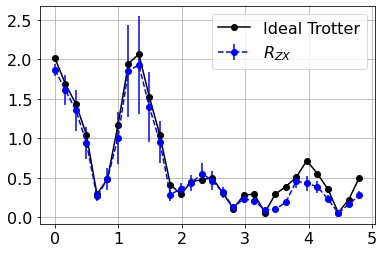

In [ ]:
time=np.linspace(0,TT,n)
plt.plot(time,np.sqrt(a**2+b**2),"go-",c='k',label='Ideal Trotter')
#plt.plot(time,Z_pi_pulse,c='b')
plt.errorbar(time,abs_cor, yerr=cor_std, fmt='bo--', color='r', label='$R_{ZX}$')
plt.legend(fontsize = 16)
#plt.ylim(0.97, 1.0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.show()